In [1]:
import numpy as np
import scipy
import pandas
import treelib
import pyclust
import pandas

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pyclust.__version__

'0.1.4'

In [4]:
#### co-centric circles
d = np.random.uniform(low=-6, high=6, size=(1000,2))

d1a = d[(d[:,0]**2 + d[:,1]**2 <36) & (d[:,0]**2 + d[:,1]**2 >25), :]

d = np.random.uniform(low=-4, high=4, size=(800,2))

#d1b = d[(d[:,0]**2 + d[:,1]**2 <9) & (d[:,0]**2 + d[:,1]**2 > 4),:]
d1c = d[(d[:,0]**2 + d[:,1]**2 <=3), :]

X = np.vstack((d1a,d1c))

print("Cluster sizes %s "%[d1a.shape[0], d1c.shape[0]]) #, d1c.shape[0]])

Cluster sizes [239, 118] 


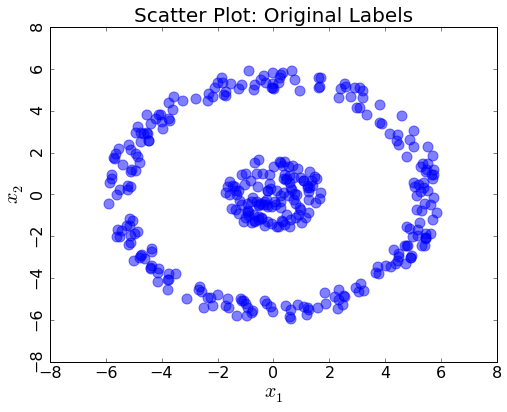

In [5]:
def plot_scatter(X, labels1=None, labels2=None, titles=["Scatter Plot", None]):
    
    labels1 = np.zeros(shape=X.shape[0], dtype=int) if labels1 is None else labels1
    
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    
    for i,lab in enumerate(np.unique(labels1)):
        col_dict[lab] = colors[i]
        
    
    if labels2 is None:
        fig = plt.figure(1, figsize=(8,6))
        ax1 = fig.add_subplot(1, 1, 1)
    else:
        fig = plt.figure(1, figsize=(12,6))
        ax1 = fig.add_subplot(1, 2, 1)

    for i in np.unique(labels1):
        indx = np.where(labels1 == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax1.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax1.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(titles[0], size=20)

    
    if labels2 is not None:
        ax2 = fig.add_subplot(1, 2, 2)
        for i in np.unique(labels2):
            indx = np.where(labels2 == i)[0]
            plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

        plt.setp(ax1.get_xticklabels(), rotation='horizontal', fontsize=16)
        plt.setp(ax1.get_yticklabels(), rotation='vertical', fontsize=16)

        plt.xlabel('$x_1$', size=20)
        plt.ylabel('$x_2$', size=20)
        plt.title(titles[1], size=20)
        
    plt.show()
    
## test plot original data
plot_scatter(X, labels1=None, titles=["Scatter Plot: Original Labels"])

Converged after 6 iterations


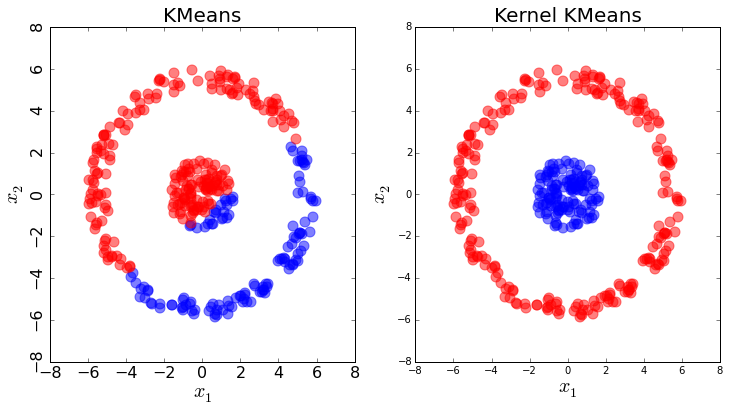

In [5]:
## Performing KMeans  
km = pyclust.KMeans(n_clusters=2, n_trials=50)

km.fit(X)

### Performing Kernel K-means

kkm = pyclust.KernelKMeans(n_clusters=2, kernel='rbf', params={'gamma':0.5})
kkm.fit(X)
print("Converged after %d iterations"%kkm.n_iter_)
plot_scatter(X, labels1=km.labels_, labels2=kkm.labels_, titles=["KMeans", "Kernel KMeans"])

## Half-moons

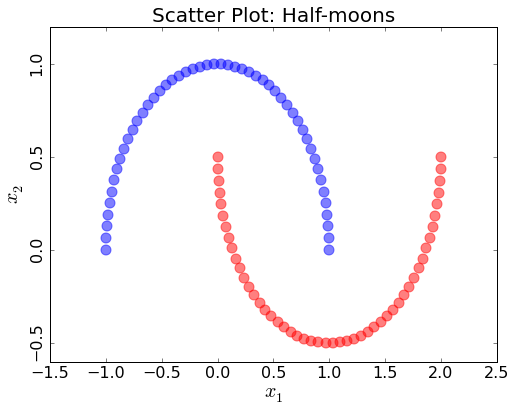

In [6]:
import sklearn.datasets
X_moon,y_moon = sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

plot_scatter(X_moon, labels1=y_moon, titles=["Scatter Plot: Half-moons"])

Converged after 1 iterations


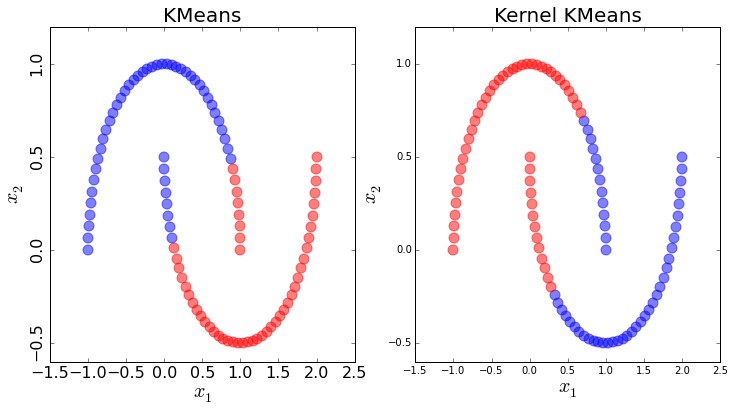

In [8]:
## Performing KMeans  
km = pyclust.KMeans(n_clusters=2, n_trials=50)

km.fit(X_moon)

### Performing Kernel K-means

kkm = pyclust.KernelKMeans(n_clusters=2, n_trials=100, kernel='rbf', params={'gamma':0.01})
kkm.fit(X_moon)
print("Converged after %d iterations"%kkm.n_iter_)
plot_scatter(X_moon, labels1=km.labels_, labels2=kkm.labels_, titles=["KMeans", "Kernel KMeans"])

In [6]:
s1 = np.array([[0.02, 0.05], [0.5, 2.0]])
s2 = np.array([[0.6, 0.0], [0.0, 1.1]])
#s3 = np.array([[0.4, -0.5], [-0.04, 0.3]])
s3 = np.array([[0.4, -0.5], [-0.02, 0.2]])

m1 = np.array([-2.0, 1.0])
m2 = np.array([0.0, -3.0])
m3 = np.array([1.0, 2.0])

X1 = np.random.multivariate_normal(mean=m1, cov=s1, size=200)
X2 = np.random.multivariate_normal(mean=m2, cov=s2, size=300)
X3 = np.random.multivariate_normal(mean=m3, cov=s3, size=100)

X = np.vstack((X1, X2, X3))

indx_arr = np.arange(X.shape[0])
np.random.shuffle(indx_arr)

y = np.hstack((np.zeros(200, dtype=int), np.ones(300, dtype=int), 2*np.ones(100, dtype=int)))
X = X[indx_arr,:]
y = y[indx_arr]

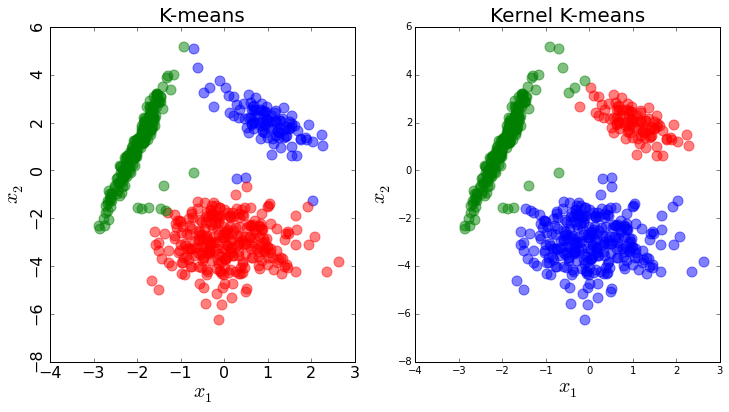

In [9]:
km2 = pyclust.KMeans(n_clusters=3)
km2.fit(X)

kkm2 = pyclust.KernelKMeans(n_clusters=3, kernel='rbf')
kkm2.fit(X)

plot_scatter(X, labels1=km2.labels_, labels2=kkm2.labels_, titles=["K-means", "Kernel K-means"])